In [1]:
# Importing necessary libraries to unzip `tiny-imagenet-200.zip`
import os
import zipfile
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Unzip the dataset
with zipfile.ZipFile("tiny-imagenet-200.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Lets see the directory structure of tiny-imagenet-200
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        jpeg_files = [f for f in files if f.endswith('.JPEG')]
        if jpeg_files:  # if the list is not empty
            print('{}Number of JPEG files: {}'.format(subindent, len(jpeg_files)))
        for f in files:
            if f.endswith('.txt'):
                print('{}{}'.format(subindent, f))

list_files('tiny-imagenet-200')

tiny-imagenet-200/
    wnids.txt
    words.txt
    test/
        images/
            Number of JPEG files: 10000
    train/
        n02795169/
            n02795169_boxes.txt
            images/
                Number of JPEG files: 500
        n02769748/
            n02769748_boxes.txt
            images/
                Number of JPEG files: 500
        n07920052/
            n07920052_boxes.txt
            images/
                Number of JPEG files: 500
        n02917067/
            n02917067_boxes.txt
            images/
                Number of JPEG files: 500
        n01629819/
            n01629819_boxes.txt
            images/
                Number of JPEG files: 500
        n02058221/
            n02058221_boxes.txt
            images/
                Number of JPEG files: 500
        n02793495/
            n02793495_boxes.txt
            images/
                Number of JPEG files: 500
        n04251144/
            n04251144_boxes.txt
            images/
              

In [4]:
# Path and Files
path = './tiny-imagenet-200/train/'
wnid_labels = dict(line.strip().split('\t') for line in open('./tiny-imagenet-200/words.txt'))  # Corrected path
dirs = os.listdir(path)

# Read the wnids from wnids.txt into a set
with open('./tiny-imagenet-200/wnids.txt') as f:
    wnids = {line.strip() for line in f}

# Filter wnid_labels to only include the wnids in Tiny ImageNet
wnid_labels = {wnid: desc for wnid, desc in wnid_labels.items() if wnid in wnids}

len(wnid_labels) # We only want the mappings that are in tinynet

200

In [5]:
# Define the function to randomly sample n images
def rsample_images(n):
    """
    Sample n random images from the train directory along with their English wnid representations and bounding boxes.

    Args:
    n (int): The number of images to sample.

    Returns:
    List[Tuple]: A list of tuples where each tuple contains wnid, image path, and bounding box.
    """
    samples_with_boxes = []
    for _ in range(n):
        random_dir = random.choice(dirs)
        random_image = random.choice(os.listdir(os.path.join(path, random_dir, 'images')))
        box_data = [line.strip().split('\t') for line in open(os.path.join(path, random_dir, f"{random_dir}_boxes.txt"))]
        box_for_image = [box for box in box_data if box[0] == random_image][0]
        samples_with_boxes.append((random_dir, os.path.join(path, random_dir, 'images', random_image), box_for_image))

    return samples_with_boxes

In [6]:
# Define the function to sample n images by wordnet-id
def sample_images_by_wnid(wnid, n):
    """
    Sample 'n' images of a specific wnid from the train directory along with their English wnid representations and bounding boxes.

    Args:
    wnid (str): The wnid of the images to sample.
    n (int): The number of images to sample.

    Returns:
    List[Tuple]: A list of tuples where each tuple contains wnid, image path, and bounding box.
    """
    samples_with_boxes = []
    image_dir = os.path.join(path, wnid, 'images')
    box_data = [line.strip().split('\t') for line in open(os.path.join(path, wnid, f"{wnid}_boxes.txt"))]
    
    for image_name in os.listdir(image_dir)[:n]:
        box_for_image = [box for box in box_data if box[0] == image_name][0]
        samples_with_boxes.append((wnid, os.path.join(image_dir, image_name), box_for_image))

    return samples_with_boxes


In [7]:
# Define the function to display images
def display_images(samples_with_boxes):
    """
    Display images along with their English wnid representations and bounding boxes.

    Args:
    samples_with_boxes (List[Tuple]): A list of tuples where each tuple contains wnid, image path, and bounding box.

    Returns:
    None
    """
    n = len(samples_with_boxes)
    fig, axs = plt.subplots(n, 1, figsize=(2, 2*n))
    if n == 1:
        axs = [axs]
    for i, (wnid, img_path, box) in enumerate(samples_with_boxes):
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].title.set_text(wnid_labels[wnid])
        axs[i].title.set_fontsize(8)

        x, y, w, h = map(int, box[1:])
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        axs[i].add_patch(rect)

        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

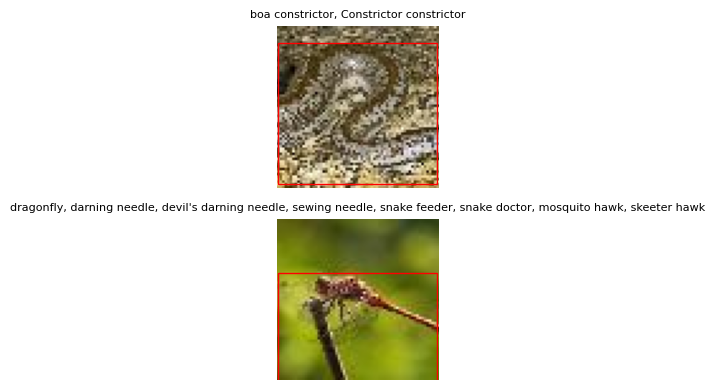

In [8]:
display_images(rsample_images(2))

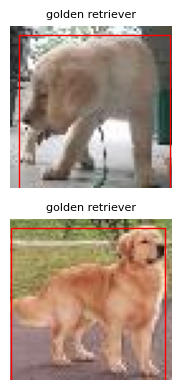

In [9]:
display_images(sample_images_by_wnid('n02099601',2))

In [10]:
# Here's how you can create a DataLoader for your dataset. Remember, this code won't run in this environment but you can use it as a template in your local environment:

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

# Load Tiny ImageNet dataset
train_dataset = datasets.ImageFolder(root='./tiny-imagenet-200/train', transform=transform)
val_dataset = datasets.ImageFolder(root='./tiny-imagenet-200/val', transform=transform)

# Create data loaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # Input channels = 3, output channels = 6, kernel size = 5
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        self.conv2 = nn.Conv2d(6, 16, 5)  # Input channels = 6, output channels = 16, kernel size = 5
        self.fc1 = nn.Linear(16 * 13 * 13, 120)  # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 200)  # 200 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Convolution -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Convolution -> ReLU -> Pooling
        x = x.view(-1, 16 * 13 * 13)  # Flatten the tensor
        x = F.relu(self.fc1(x))  # Fully connected -> ReLU
        x = F.relu(self.fc2(x))  # Fully connected -> ReLU
        x = self.fc3(x)  # Fully connected
        return x


In [12]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()  # Set the model to training mode
    total_step = len(train_loader)
    loss_list = []
    acc_list = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Run the forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())

            # Backprop and perform optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track the accuracy
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}, Accuracy: {100*(correct / total):.2f}%')

        print(f'End of Epoch [{epoch + 1}/{num_epochs}], Loss: {np.mean(loss_list):.4f}, Accuracy: {100*np.mean(acc_list):.2f}%')
        loss_list = []
        acc_list = []

In [13]:
# Initialize a fresh cnn-model with Cross Entropy Loss
cnn_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()

# Use Stochastic Gradient Descent as the optimizer for our CNN
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
num_epochs = 30
train_model(cnn_model, train_loader, criterion, optimizer, num_epochs)


Epoch [1/30], Step [100/1000], Loss: 5.2865, Accuracy: 0.00%
Epoch [1/30], Step [200/1000], Loss: 5.2938, Accuracy: 0.00%
Epoch [1/30], Step [300/1000], Loss: 5.2920, Accuracy: 1.00%
Epoch [1/30], Step [400/1000], Loss: 5.2387, Accuracy: 1.00%
Epoch [1/30], Step [500/1000], Loss: 5.1660, Accuracy: 1.00%
Epoch [1/30], Step [600/1000], Loss: 5.1987, Accuracy: 1.00%
Epoch [1/30], Step [700/1000], Loss: 5.1801, Accuracy: 2.00%
Epoch [1/30], Step [800/1000], Loss: 5.0136, Accuracy: 2.00%
Epoch [1/30], Step [900/1000], Loss: 4.7796, Accuracy: 3.00%
Epoch [1/30], Step [1000/1000], Loss: 4.9101, Accuracy: 1.00%
End of Epoch [1/30], Loss: 5.1715, Accuracy: 1.31%
Epoch [2/30], Step [100/1000], Loss: 4.8813, Accuracy: 5.00%
Epoch [2/30], Step [200/1000], Loss: 4.8184, Accuracy: 7.00%
Epoch [2/30], Step [300/1000], Loss: 4.8756, Accuracy: 3.00%
Epoch [2/30], Step [400/1000], Loss: 4.8475, Accuracy: 3.00%
Epoch [2/30], Step [500/1000], Loss: 4.7322, Accuracy: 9.00%
Epoch [2/30], Step [600/1000], Lo

In [14]:
# Initialize a fresh cnn-model with Cross Entropy Loss
cnn_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()

# Use Adam as the optimizer for our CNN
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
num_epochs = 30
train_model(cnn_model, train_loader, criterion, optimizer, num_epochs) # optimizer changed to adam

Epoch [1/30], Step [100/1000], Loss: 5.2907, Accuracy: 1.00%
Epoch [1/30], Step [200/1000], Loss: 5.0452, Accuracy: 4.00%
Epoch [1/30], Step [300/1000], Loss: 4.9325, Accuracy: 2.00%
Epoch [1/30], Step [400/1000], Loss: 4.8830, Accuracy: 2.00%
Epoch [1/30], Step [500/1000], Loss: 4.4979, Accuracy: 5.00%
Epoch [1/30], Step [600/1000], Loss: 4.7937, Accuracy: 5.00%
Epoch [1/30], Step [700/1000], Loss: 4.6425, Accuracy: 3.00%
Epoch [1/30], Step [800/1000], Loss: 4.5226, Accuracy: 7.00%
Epoch [1/30], Step [900/1000], Loss: 4.4951, Accuracy: 6.00%
Epoch [1/30], Step [1000/1000], Loss: 4.6570, Accuracy: 7.00%
End of Epoch [1/30], Loss: 4.7844, Accuracy: 4.76%
Epoch [2/30], Step [100/1000], Loss: 4.1903, Accuracy: 15.00%
Epoch [2/30], Step [200/1000], Loss: 4.2794, Accuracy: 8.00%
Epoch [2/30], Step [300/1000], Loss: 4.3005, Accuracy: 14.00%
Epoch [2/30], Step [400/1000], Loss: 4.2853, Accuracy: 10.00%
Epoch [2/30], Step [500/1000], Loss: 4.0124, Accuracy: 18.00%
Epoch [2/30], Step [600/1000]

#### Observations:
Notice how much faster `optim.Adam(lr=0.001)` converges at first compared to `optim.SGD(lr=0.01)`!

Note: We still have yet to validate these trained models. They could still just be overfitting to gain accuracy, we will need to investigate these trained models results on the val dataset!

I tried to run Adam at lr=0.01 but it wouldn't converge at all.

Running for 30 epochs each on my MacBook Air w/ M1 chip takes 48 minutes.

Time to move to the Nvidia 4090